<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Logo_udinus1.jpg/225px-Logo_udinus1.jpg' weight='200'></center>

<hr>

#UJIAN AKHIR SEMESTER DECISSION SUPPORT SYSTEM
## Oleh  : Irvan Cahaya Putra | P31.2022.02550
## Kelas : DSS MTI 42 REG

materi yang disampaikan adalah **DSS05- nilai yang hilang**, meliputi:

Datasets
- Heart Disease: https://archive.ics.uci.edu/dataset/45/heart+disease
- Preprocessing: Preprocessing data: cleaning, missing value, **resampling**

Machine Learning
- Klasifikasi dengan Algoritma Decission Tree
- Optimasi parameter dengan metode gird search
- K-fold Cross Validation  





<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

In [ ]:
# Import Lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from collections import Counter
from imblearn.over_sampling import SMOTE

import time


pd.set_option('display.max_columns', None)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/')
# # uncomment untuk menyimpan pada drive

Mounted at /content/drive


# Datasets & Preprocessing
dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data

In [ ]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', header=None)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [ ]:
dataset.columns=["Age","Sex","Cp","Trestbps","Chol","Fbs","Restecg","Thalach",
                 "Exang","Oldpeak","Slope","Ca","Thal","Num"]

In [ ]:
dataset

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       294 non-null    int64  
 1   Sex       294 non-null    int64  
 2   Cp        294 non-null    int64  
 3   Trestbps  294 non-null    object 
 4   Chol      294 non-null    object 
 5   Fbs       294 non-null    object 
 6   Restecg   294 non-null    object 
 7   Thalach   294 non-null    object 
 8   Exang     294 non-null    object 
 9   Oldpeak   294 non-null    float64
 10  Slope     294 non-null    object 
 11  Ca        294 non-null    object 
 12  Thal      294 non-null    object 
 13  Num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
dataset['Num'].value_counts()

0    188
1    106
Name: Num, dtype: int64

maka 1 adalah Disease dan 0 adalah Normal

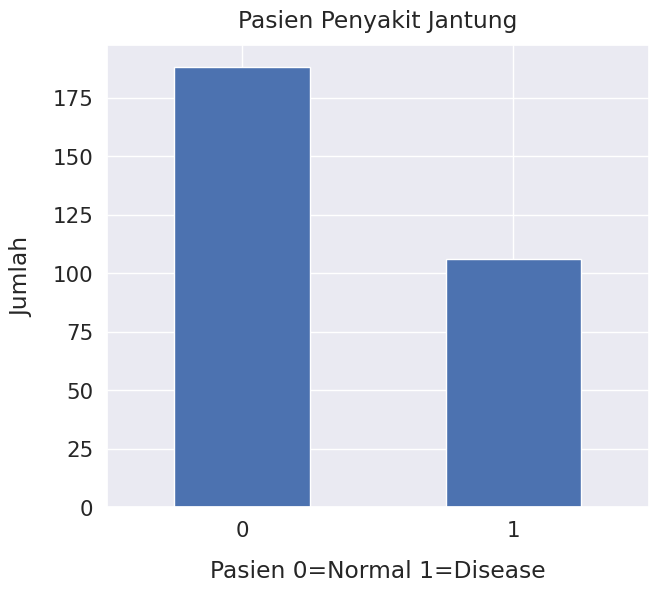

In [ ]:
sns.set(font_scale=1.4)
dataset['Num'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Pasien 0=Normal 1=Disease", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Pasien Penyakit Jantung", y=1.02);

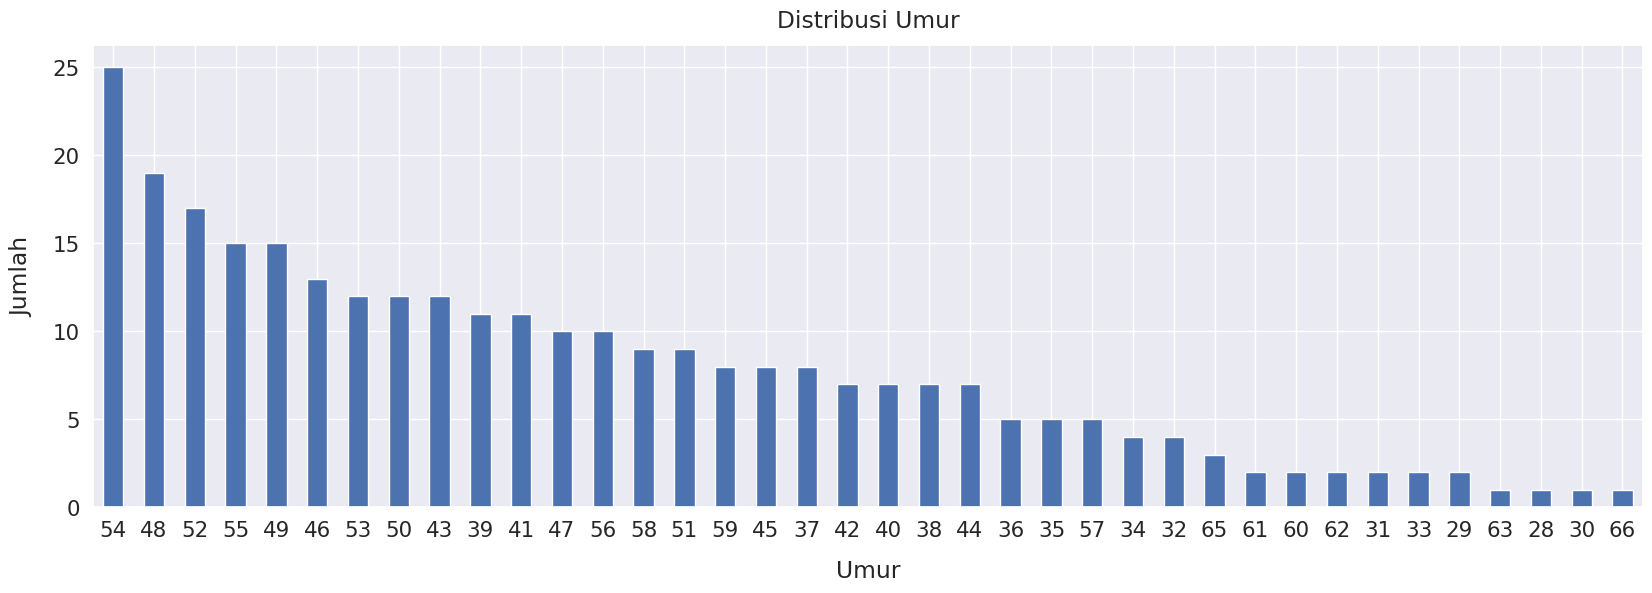

In [ ]:
sns.set(font_scale=1.4)
dataset['Age'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Umur", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Umur", y=1.02);

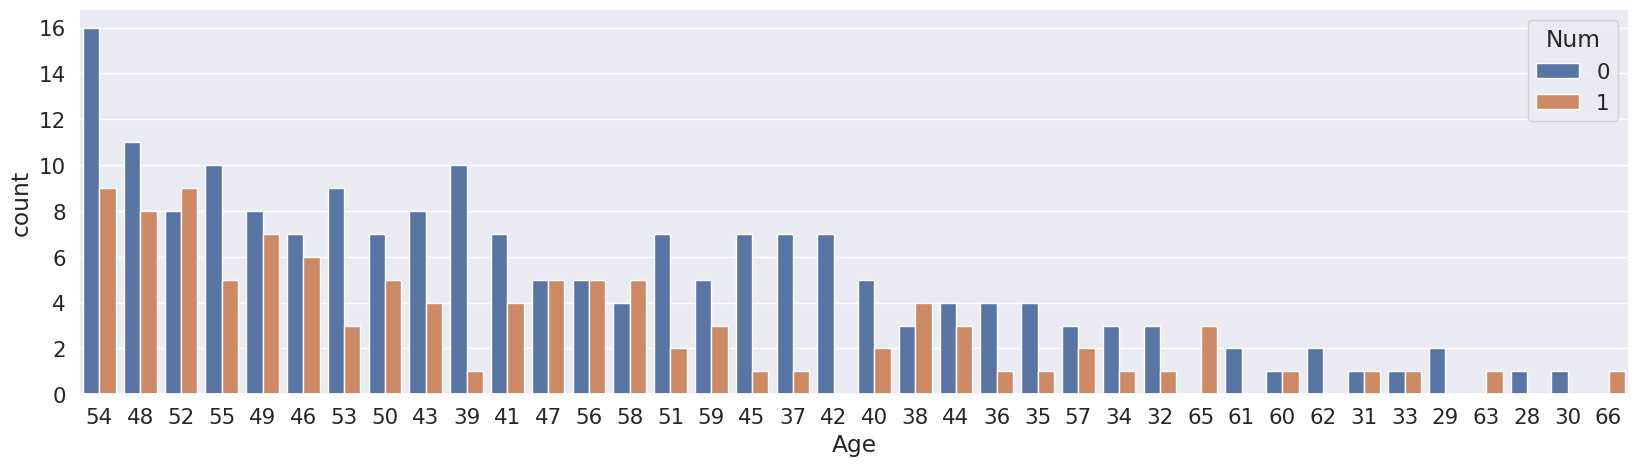

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['Age'],order=dataset['Age'].value_counts().index,hue=dataset['Num'])
plt.show()

# plot biru bernilai sehat, oranye untuk terindikasi sakit

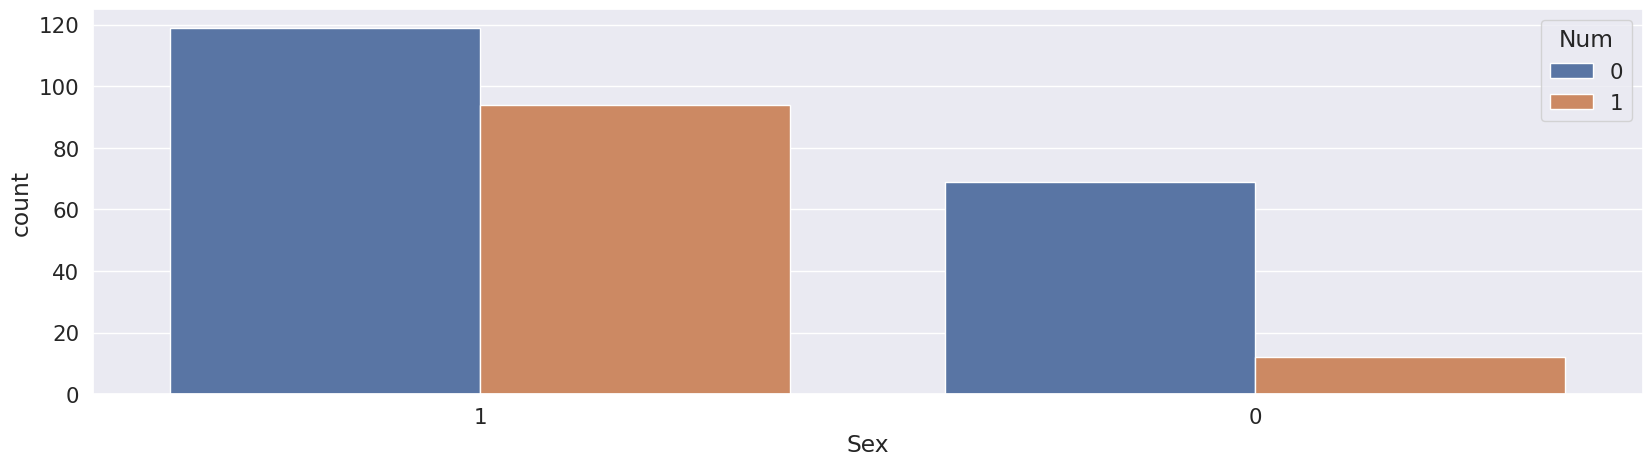

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['Sex'],order=dataset['Sex'].value_counts().index,hue=dataset['Num'])
plt.show()

# plot biru bernilai sehat, oranye untuk terindikasi sakit
# 1 untuk male, 0 untuk female

## cek nilai yang hilang

In [ ]:
dataset.replace("?", np.nan, inplace= True)

In [ ]:
dataset.isnull().sum()

Age           0
Sex           0
Cp            0
Trestbps      1
Chol         23
Fbs           8
Restecg       1
Thalach       1
Exang         1
Oldpeak       0
Slope       190
Ca          291
Thal        266
Num           0
dtype: int64

In [ ]:
dataset.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [ ]:
dataset.isnull().values.any()

True

In [ ]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach', 'Exang', 'Slope', 'Ca',
       'Thal'],
      dtype='object')

In [ ]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

Trestbps     0.340136
Chol         7.823129
Fbs          2.721088
Restecg      0.340136
Thalach      0.340136
Exang        0.340136
Slope       64.625850
Ca          98.979592
Thal        90.476190
dtype: float64

<Axes: >

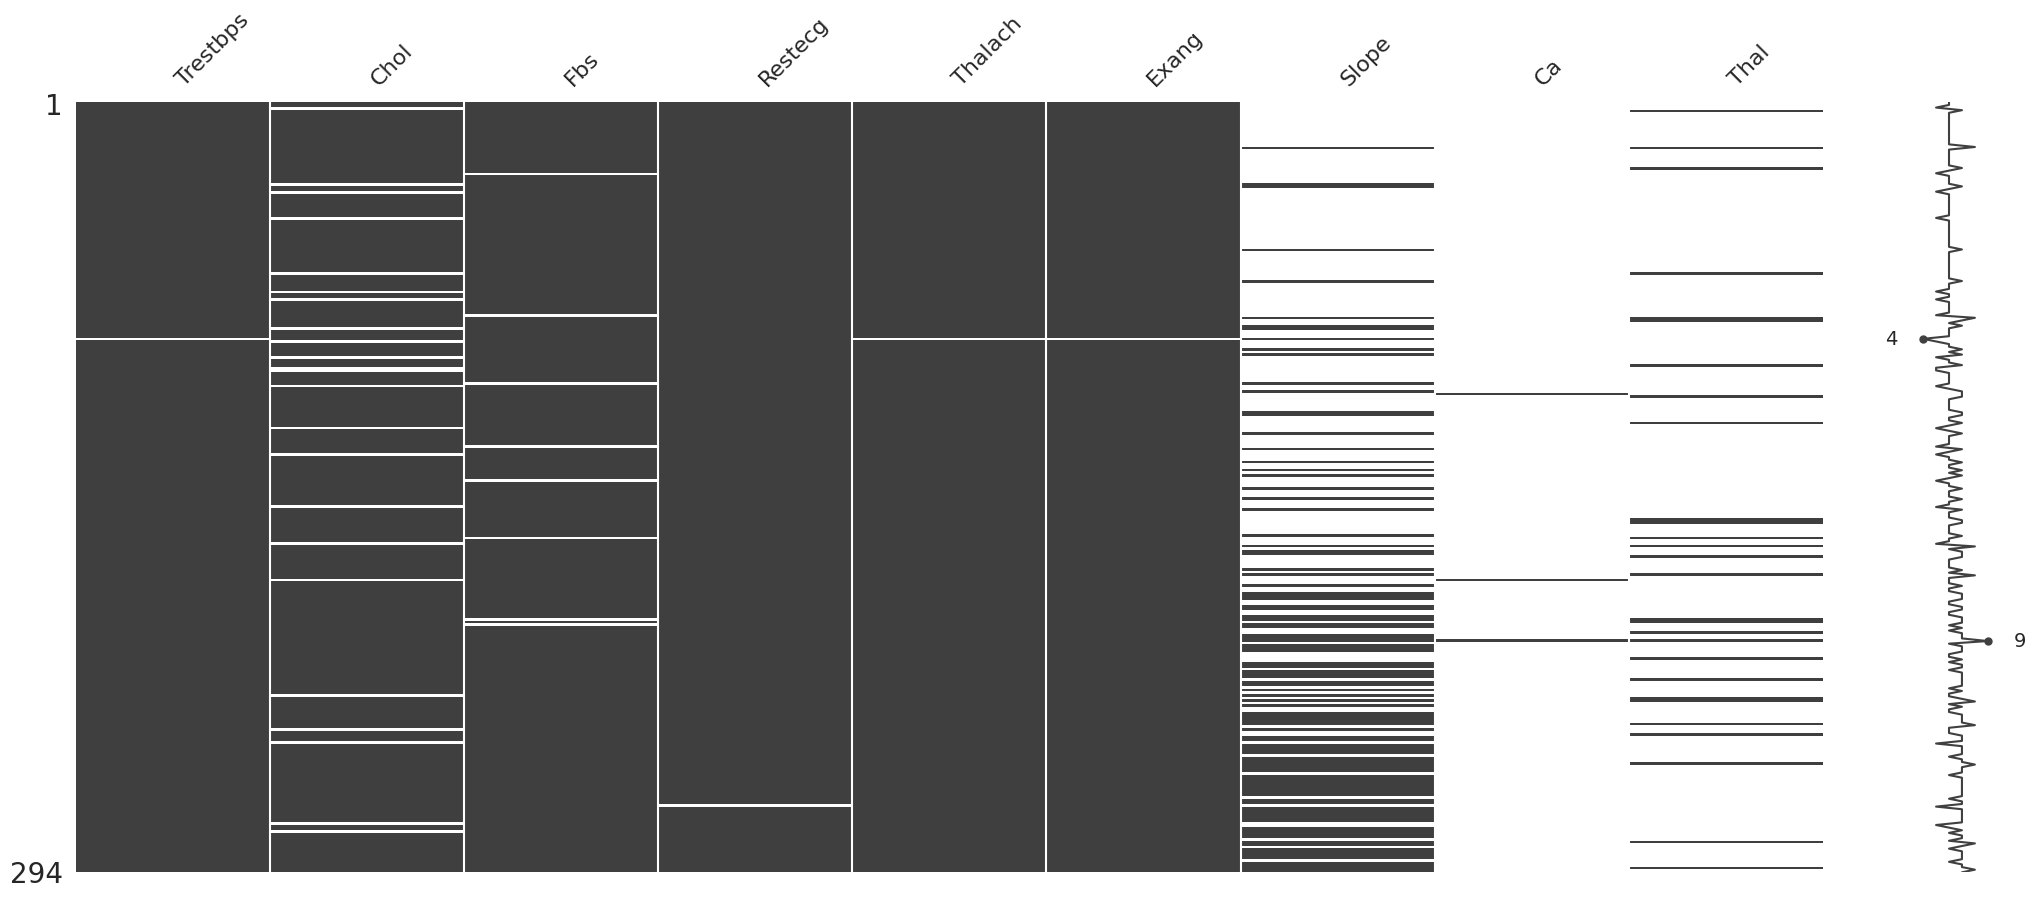

In [ ]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [ ]:
dataset['Ca'].value_counts()
# kolom ini nanti dihapus karena banyak fitur tidak diketahui, jika diisi dengan median maka nilainya akan sama dalam satu kolom

0    3
Name: Ca, dtype: int64

In [ ]:
dataset['Slope'].value_counts()

2    91
1    12
3     1
Name: Slope, dtype: int64

In [ ]:
dataset['Thal'].value_counts()

7    11
6    10
3     7
Name: Thal, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       294 non-null    int64  
 1   Sex       294 non-null    int64  
 2   Cp        294 non-null    int64  
 3   Trestbps  293 non-null    object 
 4   Chol      271 non-null    object 
 5   Fbs       286 non-null    object 
 6   Restecg   293 non-null    object 
 7   Thalach   293 non-null    object 
 8   Exang     293 non-null    object 
 9   Oldpeak   294 non-null    float64
 10  Slope     104 non-null    object 
 11  Ca        3 non-null      object 
 12  Thal      28 non-null     object 
 13  Num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
# Perbaiki Trestbps
median_value=dataset['Trestbps'].median()
dataset['Trestbps']=dataset['Trestbps'].fillna(median_value)

# Perbaiki Chol
median_value=dataset['Chol'].median()
dataset['Chol']=dataset['Chol'].fillna(median_value)

# Perbaiki Fbs
median_value=dataset['Fbs'].median()
dataset['Fbs']=dataset['Fbs'].fillna(median_value)

# Perbaiki Restecg
median_value=dataset['Restecg'].median()
dataset['Restecg']=dataset['Restecg'].fillna(median_value)

# Perbaiki Thalach
median_value=dataset['Thalach'].median()
dataset['Thalach']=dataset['Thalach'].fillna(median_value)

# Perbaiki Exang
median_value=dataset['Exang'].median()
dataset['Exang']=dataset['Exang'].fillna(median_value)

# Perbaiki Slope
median_value=dataset['Slope'].median()
dataset['Slope']=dataset['Slope'].fillna(median_value)

# Perbaiki Ca
median_value=dataset['Ca'].median()
dataset['Ca']=dataset['Ca'].fillna(median_value)

# Perbaiki Thal
median_value=dataset['Thal'].median()
dataset['Thal']=dataset['Thal'].fillna(median_value)



In [ ]:
dataset

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
0,28,1,2,130,132,0,2,185,0,0.0,2.0,0.0,6.0,0
1,29,1,2,120,243,0,0,160,0,0.0,2.0,0.0,6.0,0
2,29,1,2,140,243.0,0,0,170,0,0.0,2.0,0.0,6.0,0
3,30,0,1,170,237,0,1,170,0,0.0,2.0,0.0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2.0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,2.0,0.0,6.0,1
290,54,0,3,130,294,0,1,100,1,0.0,2,0.0,6.0,1
291,56,1,4,155,342,1,0,150,1,3.0,2,0.0,6.0,1
292,58,0,2,180,393,0,0,110,1,1.0,2,0.0,7,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       294 non-null    int64  
 1   Sex       294 non-null    int64  
 2   Cp        294 non-null    int64  
 3   Trestbps  294 non-null    object 
 4   Chol      294 non-null    object 
 5   Fbs       294 non-null    object 
 6   Restecg   294 non-null    object 
 7   Thalach   294 non-null    object 
 8   Exang     294 non-null    object 
 9   Oldpeak   294 non-null    float64
 10  Slope     294 non-null    object 
 11  Ca        294 non-null    object 
 12  Thal      294 non-null    object 
 13  Num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


## rekonstruksi format data

In [ ]:
dataset['Trestbps'] = dataset['Trestbps'].astype(str).astype(float)
dataset['Chol'] = dataset['Chol'].astype(str).astype(float)
dataset['Fbs'] = dataset['Fbs'].astype(str).astype(float)
dataset['Restecg'] = dataset['Restecg'].astype(str).astype(float)
dataset['Thalach'] = dataset['Thalach'].astype(str).astype(float)
dataset['Exang'] = dataset['Exang'].astype(str).astype(float)
dataset['Slope'] = dataset['Slope'].astype(str).astype(float)
dataset['Ca'] = dataset['Ca'].astype(str).astype(float)
dataset['Thal'] = dataset['Thal'].astype(str).astype(float)

In [ ]:
dataset.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.574830,250.234694,0.068027,0.217687,139.132653,0.302721,0.586054,1.962585,0.0,5.965986,0.360544
std,7.811812,0.447533,0.965117,17.597108,64.982245,0.252222,0.460257,23.549514,0.460219,0.908648,0.207277,0.0,0.501397,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.250000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,6.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       294 non-null    int64  
 1   Sex       294 non-null    int64  
 2   Cp        294 non-null    int64  
 3   Trestbps  294 non-null    float64
 4   Chol      294 non-null    float64
 5   Fbs       294 non-null    float64
 6   Restecg   294 non-null    float64
 7   Thalach   294 non-null    float64
 8   Exang     294 non-null    float64
 9   Oldpeak   294 non-null    float64
 10  Slope     294 non-null    float64
 11  Ca        294 non-null    float64
 12  Thal      294 non-null    float64
 13  Num       294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


## menghapus kolom fitur yang nilainya konstan

In [ ]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       294 non-null    int64  
 1   Sex       294 non-null    int64  
 2   Cp        294 non-null    int64  
 3   Trestbps  294 non-null    float64
 4   Chol      294 non-null    float64
 5   Fbs       294 non-null    float64
 6   Restecg   294 non-null    float64
 7   Thalach   294 non-null    float64
 8   Exang     294 non-null    float64
 9   Oldpeak   294 non-null    float64
 10  Slope     294 non-null    float64
 11  Thal      294 non-null    float64
 12  Num       294 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 30.0 KB


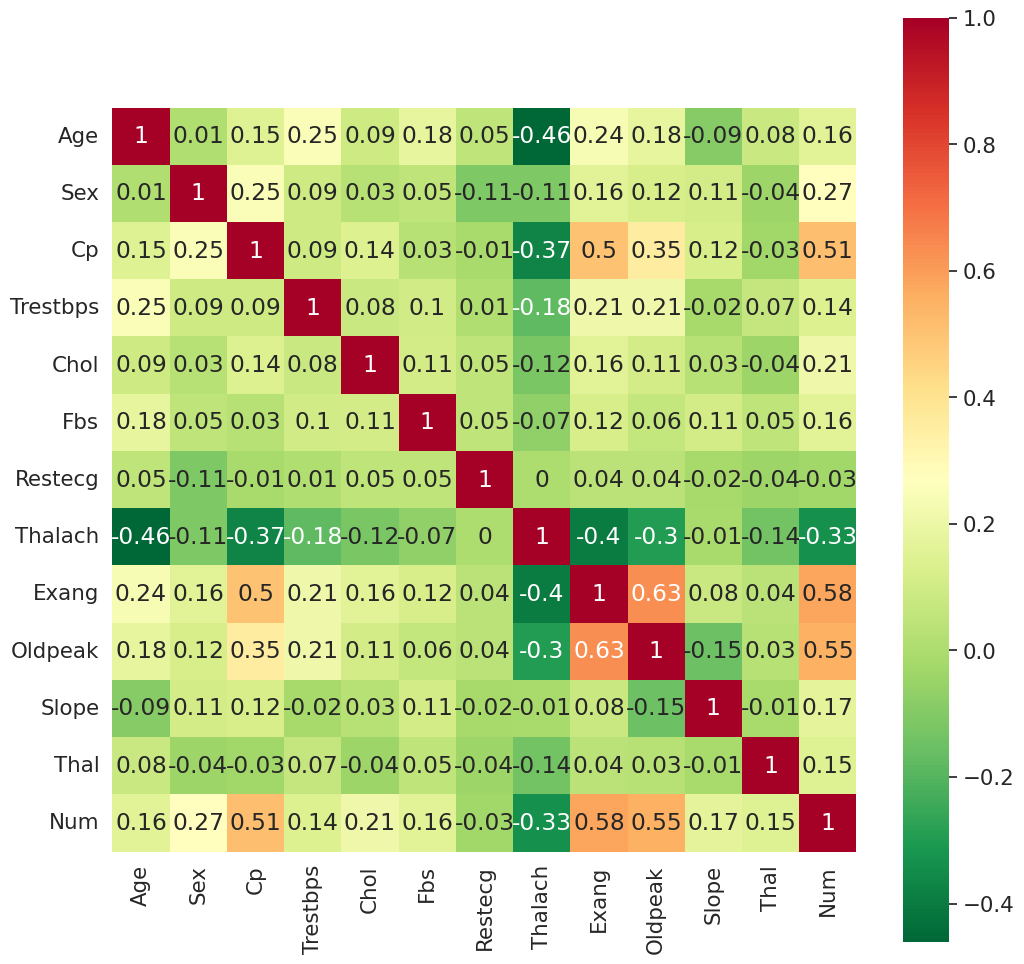

In [ ]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## menentukan label data

In [ ]:
y = dataset['Num']

In [ ]:
X = dataset.drop(['Num'], 1)

<ipython-input-33-7e424e58ee83>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop(['Num'], 1)


# Modeling

## kfold cross validation

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

## decision tree model

In [ ]:
classifier_dt_pipeline = Pipeline([
    ('model', DecisionTreeClassifier())
])

In [ ]:
parameters_dt = {
    "model__max_depth": np.arange(1, 21),
    "model__min_samples_leaf": np.arange(1, 20, 2),
    "model__min_samples_split": np.arange(2, 5),
    "model__criterion": ['gini', 'entropy'],
    "model__random_state": [42]
}

In [ ]:
modified_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=kf, n_jobs=-1)

# Skenario 1, datasets normal tanpa resampling

## permodelan

In [ ]:

# Membuat, melatih, dan mengevaluasi model dengan k-fold cross-validation
fold_metrics = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

    # Membuat dan melatih model pada setiap fold, dan hitung waktu pelatihan tiap fold
    start_time = time.time()
    modified_classifier_dt.fit(X_train, Y_train.ravel())
    end_time = time.time()
    total_time = end_time - start_time

    # Memprediksi label untuk evaluasi
    y_train_pred = cross_val_predict(modified_classifier_dt, X_train, Y_train.ravel(), cv=kf)
    y_test_pred = modified_classifier_dt.predict(X_test)

    # Menghitung metrik evaluasi
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    test_accuracy = accuracy_score(Y_test, y_test_pred)

    train_precision = precision_score(Y_train, y_train_pred, average='weighted')
    test_precision = precision_score(Y_test, y_test_pred, average='weighted')

    train_recall = recall_score(Y_train, y_train_pred, average='weighted')
    test_recall = recall_score(Y_test, y_test_pred, average='weighted')

    train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(Y_test, y_test_pred, average='weighted')

    # Menampilkan performa model pada setiap fold
    print(f"\nFold {fold}:\n"
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n"
          f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}\n"
          f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}\n"
          f"Train F1-score: {train_f1:.4f}, Test F1-score: {test_f1:.4f}\n"
          f"Training Time: {total_time} seconds")

    # Menyimpan metrik evaluasi untuk rata-rata keseluruhan
    fold_metrics.append({
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1-score': train_f1,
        'Test F1-score': test_f1,
        'Training Time': total_time,
    })



Fold 1:
Train Accuracy: 0.8085, Test Accuracy: 0.7797
Train Precision: 0.8061, Test Precision: 0.8106
Train Recall: 0.8085, Test Recall: 0.7797
Train F1-score: 0.8046, Test F1-score: 0.7842
Training Time: 29.28297758102417 seconds

Fold 2:
Train Accuracy: 0.7872, Test Accuracy: 0.7119
Train Precision: 0.7846, Test Precision: 0.7170
Train Recall: 0.7872, Test Recall: 0.7119
Train F1-score: 0.7844, Test F1-score: 0.7142
Training Time: 22.577275276184082 seconds

Fold 3:
Train Accuracy: 0.7702, Test Accuracy: 0.7966
Train Precision: 0.7672, Test Precision: 0.7966
Train Recall: 0.7702, Test Recall: 0.7966
Train F1-score: 0.7682, Test F1-score: 0.7966
Training Time: 21.87348246574402 seconds

Fold 4:
Train Accuracy: 0.7830, Test Accuracy: 0.7288
Train Precision: 0.7800, Test Precision: 0.7543
Train Recall: 0.7830, Test Recall: 0.7288
Train F1-score: 0.7811, Test F1-score: 0.7182
Training Time: 21.1120126247406 seconds

Fold 5:
Train Accuracy: 0.7797, Test Accuracy: 0.8621
Train Precision: 

## evaluasi performa model

In [ ]:
# Menghitung rata-rata performa keseluruhan
average_metrics = {}
for metric in fold_metrics[0].keys():
    average_metrics[metric] = sum(fold[metric] for fold in fold_metrics) / len(fold_metrics)

# Menampilkan rata-rata performa keseluruhan
print("\nRata-rata Performa Keseluruhan:")
for metric, value in average_metrics.items():
    print(f"{metric}: {value:.4f}")


Rata-rata Performa Keseluruhan:
Train Accuracy: 0.7857
Test Accuracy: 0.7758
Train Precision: 0.7833
Test Precision: 0.7880
Train Recall: 0.7857
Test Recall: 0.7758
Train F1-score: 0.7835
Test F1-score: 0.7740
Training Time: 23.3832


## visualisasi performa model

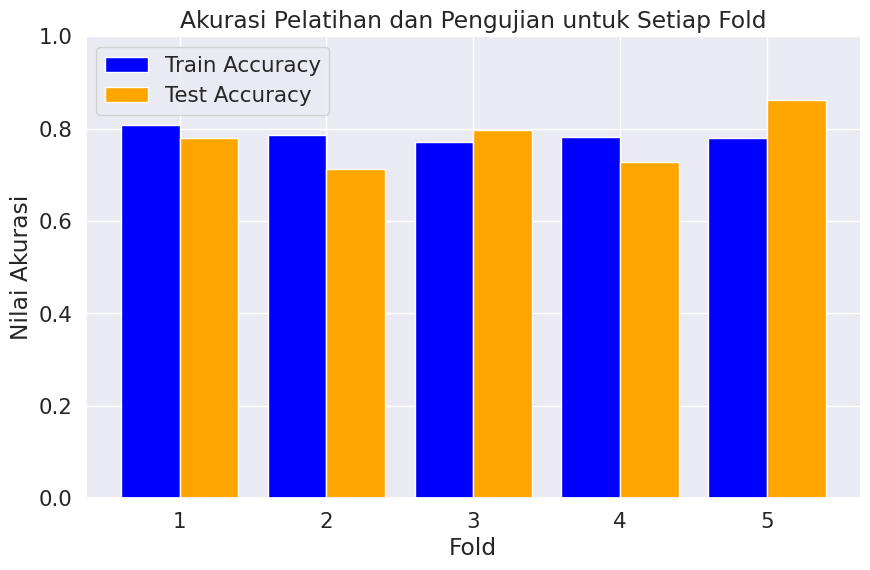

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mengambil metrik akurasi untuk setiap fold
train_accuracies = [fold['Train Accuracy'] for fold in fold_metrics]
test_accuracies = [fold['Test Accuracy'] for fold in fold_metrics]

# Membuat indeks untuk setiap fold
fold_indices = np.arange(1, len(train_accuracies) + 1)

# Membuat bar chart untuk akurasi pelatihan dan pengujian
plt.figure(figsize=(10, 6))
plt.bar(fold_indices - 0.2, train_accuracies, width=0.4, label='Train Accuracy', color='blue')
plt.bar(fold_indices + 0.2, test_accuracies, width=0.4, label='Test Accuracy', color='orange')
plt.title('Akurasi Pelatihan dan Pengujian untuk Setiap Fold')
plt.xlabel('Fold')
plt.ylabel('Nilai Akurasi')
plt.ylim(0, 1)  # Mengatur batas nilai pada sumbu y
plt.legend()
plt.show()

# Skenario 2, implementasi oversampling pada datasets

## SMOTE oversampling

In [ ]:
oversample = SMOTE(sampling_strategy='auto')

In [ ]:
print(Counter(y))

Counter({0: 188, 1: 106})


In [ ]:
X, y = oversample.fit_resample(X, y)

In [ ]:
print(Counter(y))

Counter({0: 188, 1: 188})


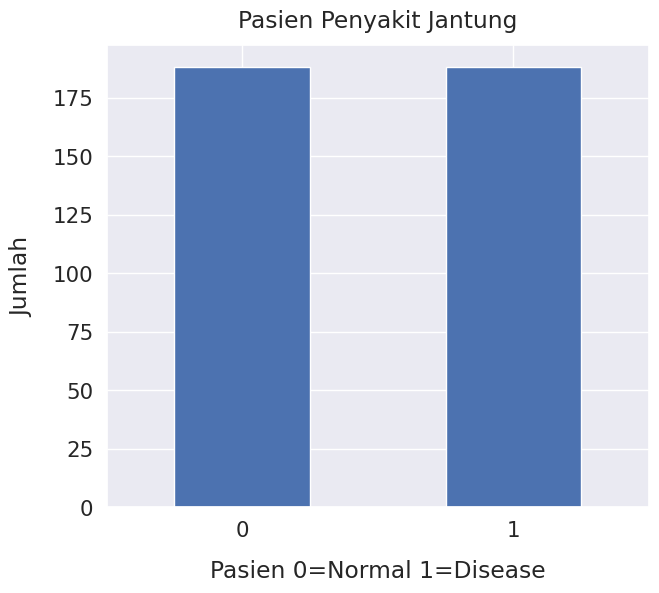

In [ ]:
sns.set(font_scale=1.4)
y.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Pasien 0=Normal 1=Disease", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Pasien Penyakit Jantung", y=1.02);

## Permodelan

In [ ]:

# Membuat, melatih, dan mengevaluasi model dengan k-fold cross-validation
smote_fold_metrics = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

    # Membuat dan melatih model pada setiap fold
    start_time = time.time()
    modified_classifier_dt.fit(X_train, Y_train.ravel())
    end_time = time.time()
    total_time = end_time - start_time

    # Memprediksi label untuk evaluasi
    y_train_pred = cross_val_predict(modified_classifier_dt, X_train, Y_train.ravel(), cv=kf)
    y_test_pred = modified_classifier_dt.predict(X_test)

    # Menghitung metrik evaluasi
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    test_accuracy = accuracy_score(Y_test, y_test_pred)

    train_precision = precision_score(Y_train, y_train_pred, average='weighted')
    test_precision = precision_score(Y_test, y_test_pred, average='weighted')

    train_recall = recall_score(Y_train, y_train_pred, average='weighted')
    test_recall = recall_score(Y_test, y_test_pred, average='weighted')

    train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(Y_test, y_test_pred, average='weighted')

    # Menampilkan performa model pada setiap fold
    print(f"\nFold {fold}:\n"
          f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n"
          f"Train Precision: {train_precision:.4f}, Test Precision: {test_precision:.4f}\n"
          f"Train Recall: {train_recall:.4f}, Test Recall: {test_recall:.4f}\n"
          f"Train F1-score: {train_f1:.4f}, Test F1-score: {test_f1:.4f}\n"
          f"Training Time: {total_time} seconds")

    # Menyimpan metrik evaluasi untuk rata-rata keseluruhan
    smote_fold_metrics.append({
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1-score': train_f1,
        'Test F1-score': test_f1,
        'Training Time': total_time,
    })



Fold 1:
Train Accuracy: 0.8233, Test Accuracy: 0.7895
Train Precision: 0.8279, Test Precision: 0.7997
Train Recall: 0.8233, Test Recall: 0.7895
Train F1-score: 0.8230, Test F1-score: 0.7852
Training Time: 22.172703742980957 seconds

Fold 2:
Train Accuracy: 0.8106, Test Accuracy: 0.7867
Train Precision: 0.8118, Test Precision: 0.7867
Train Recall: 0.8106, Test Recall: 0.7867
Train F1-score: 0.8105, Test F1-score: 0.7867
Training Time: 23.233208656311035 seconds

Fold 3:
Train Accuracy: 0.8239, Test Accuracy: 0.8133
Train Precision: 0.8245, Test Precision: 0.8146
Train Recall: 0.8239, Test Recall: 0.8133
Train F1-score: 0.8238, Test F1-score: 0.8134
Training Time: 22.640013217926025 seconds

Fold 4:
Train Accuracy: 0.8206, Test Accuracy: 0.8133
Train Precision: 0.8221, Test Precision: 0.8141
Train Recall: 0.8206, Test Recall: 0.8133
Train F1-score: 0.8204, Test F1-score: 0.8131
Training Time: 21.781917572021484 seconds

Fold 5:
Train Accuracy: 0.7940, Test Accuracy: 0.8667
Train Precisi

## evalusai performa model

In [ ]:
# Menghitung rata-rata performa keseluruhan
average_metrics = {}
for metric in smote_fold_metrics[0].keys():
    average_metrics[metric] = sum(fold[metric] for fold in smote_fold_metrics) / len(smote_fold_metrics)

# Menampilkan rata-rata performa keseluruhan
print("\nRata-rata Performa Keseluruhan:")
for metric, value in average_metrics.items():
    print(f"{metric}: {value:.4f}")


Rata-rata Performa Keseluruhan:
Train Accuracy: 0.8145
Test Accuracy: 0.8139
Train Precision: 0.8165
Test Precision: 0.8175
Train Recall: 0.8145
Test Recall: 0.8139
Train F1-score: 0.8142
Test F1-score: 0.8131
Training Time: 22.7397


## visualisasi performa model

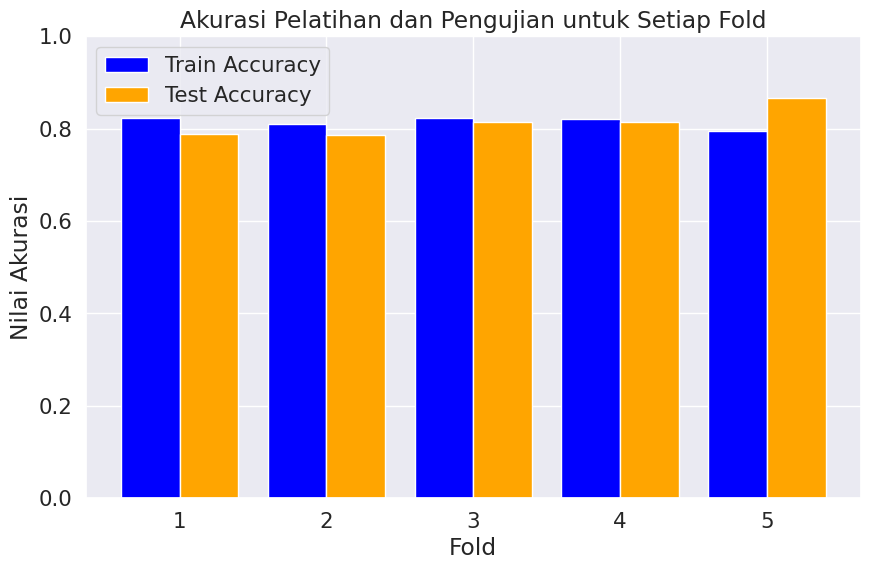

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mengambil metrik akurasi untuk setiap fold
train_accuracies = [fold['Train Accuracy'] for fold in smote_fold_metrics]
test_accuracies = [fold['Test Accuracy'] for fold in smote_fold_metrics]

# Membuat indeks untuk setiap fold
fold_indices = np.arange(1, len(train_accuracies) + 1)

# Membuat bar chart untuk akurasi pelatihan dan pengujian
plt.figure(figsize=(10, 6))
plt.bar(fold_indices - 0.2, train_accuracies, width=0.4, label='Train Accuracy', color='blue')
plt.bar(fold_indices + 0.2, test_accuracies, width=0.4, label='Test Accuracy', color='orange')
plt.title('Akurasi Pelatihan dan Pengujian untuk Setiap Fold')
plt.xlabel('Fold')
plt.ylabel('Nilai Akurasi')
plt.ylim(0, 1)  # Mengatur batas nilai pada sumbu y
plt.legend()
plt.show()

# Kesimpulan
performa model tanpa oversampling
- rerata akurasi pelatihan 78.57% sedangkan pengujian 77.58%.
- rerata f1-score pelatihan 78.35% sedangkan pengujian 77.40%.
- rerata waktu pelatihan 23.3 detik
- total waktu eksekusi cell 656.84 detik
<br><br>

performa model dengan implementasi SMOTE untuk oversampling
- rerata akurasi pelatihan 81.45% sedangkan pengujian 81.39%.
- rerata f1-score pelatihan 81.42% sedangkan pengujian 81.31%.
- rerata waktu pelatihan 22.7 detik
- waktu eksekusi cell 666.26 detik
<br><br>

dari kedua hasil tersebut didapati bahwa tidak terjadi overfitting dan terjadi kenaikan performa ketika diimplementasikan teknik oversampling.
dalam rangka meningkatkan performa machine learning model, untuk penelitian kedepan diusulkan penggunaan metode machine learning klasik lain atau penggunaan metode deeplearning dan optimasi parameter dengan rentang yang lebih luas.


